# 期中练习

## 要求

检验对上半学期知识的掌握，课后自行完成，可查阅各种资料。

### 如何提交

- 复制本文件，文件名改为`教学班号-编号.ipynb`。例如刘国强同学是2班第15号，文件名应改为`2-15.ipynb`。
- 在复制文件中答题，每道题的答案紧接题目。
- 答题结束后commit该文件，并提交pull request。



In [44]:
import numpy as np
import matplotlib.pyplot as plt

## 练习1

为了分析自变量$x$和因变量$y$的关系，通过测量得到带误差的20个样本数据如下所示

In [45]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [46]:
Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

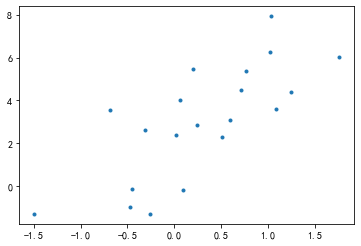

In [47]:
plt.plot(X, Y, ".")

### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

In [48]:
X_train=X[:15]
print(X_train)
X_test=X[15:]
print(X_test)
Y_train=Y[:15]
print(Y_train)
Y_test=Y[15:]
print(Y_test)

[ 0.70846042 -0.68388789  1.03780474  1.08334621  0.77026309  0.19722004
 -0.46819526 -0.45270204  0.02362673  0.06549472  0.08898416  0.59424455
 -0.26400365  0.2456922   0.5114847 ]
[-0.31604016 -1.49329364  1.24112288  1.01993764  1.75634392]
[ 4.49682518  3.5737603   7.93568197  3.58719009  5.38341441  5.47930021
 -0.9861325  -0.15686681  2.36963799  4.01600211 -0.20329642  3.07728831
 -1.30408343  2.84796441  2.27915787]
[ 2.62078689 -1.2855133   4.39242028  6.24385669  6.00822241]


### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好？

In [49]:
def regression(x,y,n):
    """
    x:自变量
    y:因变量
    n:拟合次数
    :return:参数值
    """
    A=np.ones_like(x)
    for i in range(1,n+1):
        A=np.vstack((A,x**i))
    A=A.T
    B=np.linalg.solve(np.dot(A.T,A),np.dot(A.T,y))
    return B
    

In [50]:
def meanloss(B,x,y,n):
    """
    :param B: 参数值
    :param x: 自变量
    :param y: 因变量
    :param n: 拟合次数
    :return:均方误差 
    """
    y_pre=np.zeros_like(x)
    for i in range(n+1):
        y_pre+=B[i]*(x**i)
    loss=np.sum(np.square(y_pre-y))/x.shape[0]
    return loss

NameError: name 'B1' is not defined

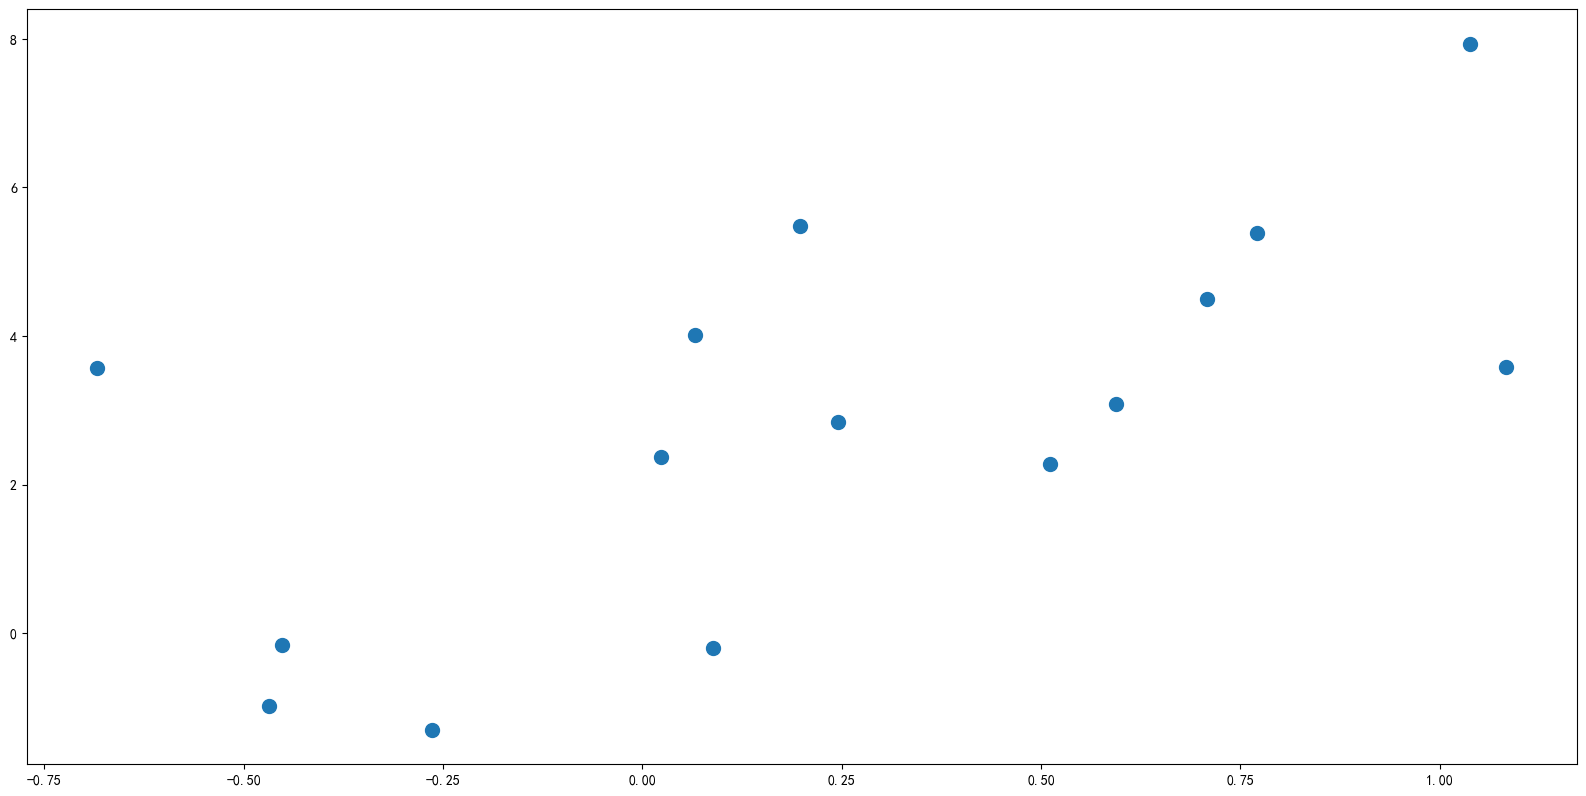

In [51]:
#画出训练集拟合图像
from pylab import mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]
mpl.rcParams["axes.unicode_minus"]=False

def show(B,x,n):
    """
    画出拟合图像
    """
    x= np.sort(x)
    y_pre=np.zeros_like(x)
    for i in range(n+1):
        y_pre+=B[i]*(x**i)
    plt.plot(x,y_pre,label="{}次式".format(n))
    plt.legend(loc=0)
    
x=np.linspace(-1.5,1.5,100)
plt.figure(figsize=(20,10),dpi=100)
plt.plot(X_train, Y_train, ".",markersize=20)
show(B1,x,1)
show(B2,x,2)
show(B3,x,3)
show(B4,x,4)
plt.ylim((-2,10))
plt.grid(linestyle="--",alpha=0.5)
plt.title("拟合图像",fontsize=20)

### 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

1.2和1.3的答案是否相同？两者的异同有什么意义？

## 练习2 人工神经网络

有如下神经网络：
- 输入$x$是2维向量，输出$y$是1维标量
- 包含两个全连接层
    - 第一层有5个神经元，激活函数为sigmoid
    - 第二层有1个神经元，激活函数为relu
- 损失函数为均方差MSE

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
- 写出整个神经网络的公式

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
\begin{equation}
ReLU(x)=\left\{
	\begin{aligned}
	0 \quad x<0\\
	x \quad x\geq0\\
	\end{aligned}
	\right
	.
\end{equation}

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
- 写出整个神经网络的公式
$$y=\text{ReLU}(W_2\sigma(W_1x+b_1)+b_2)$$
其中，$x$是输入向量，$W_1$和$b_1$是第一层的权重和偏置,$W_2$和$b_2$是第二层的权重和偏置，$y$是最终输出的标量，$\sigma$是是Sigmoid激活函数，$\text{ReLU}$是ReLU激活函数。

### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [ ]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

注意，这里输入'x'表示为行向量，即'X'中每行表示一个数据点。

In [ ]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [ ]:
W1 = np.random.randn(2,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,1)
b2 = np.random.randn(1,1)

In [ ]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [ ]:
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [ ]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [ ]:
b2 = np.array([[0.277288]])

### 2.3 方向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。